# Banking Customer Segmentation

First we start off by loading the necessary libraries.  
We are also going to use a dotenv file to store our variables such as path to the csv file.


In [2]:
import os
from dotenv import load_dotenv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from string import ascii_uppercase

load_dotenv()

True

Load the data as a pandas dataframe 


In [3]:
data_path = os.getenv('DATA_PATH')

bank_data = pd.read_csv(data_path)

bank_data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [4]:
bank_data.count()

TransactionID              1048567
CustomerID                 1048567
CustomerDOB                1045170
CustGender                 1047467
CustLocation               1048416
CustAccountBalance         1046198
TransactionDate            1048567
TransactionTime            1048567
TransactionAmount (INR)    1048567
dtype: int64

In [5]:
bank_data.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [6]:
bank_data.dropna(inplace=True)

In [7]:
bank_data.count()

TransactionID              1041614
CustomerID                 1041614
CustomerDOB                1041614
CustGender                 1041614
CustLocation               1041614
CustAccountBalance         1041614
TransactionDate            1041614
TransactionTime            1041614
TransactionAmount (INR)    1041614
dtype: int64

In [8]:
print(bank_data['CustGender'].unique())
print('M:', len(bank_data[bank_data['CustGender'] == 'M']))
print('F:', len(bank_data[bank_data['CustGender'] == 'F']))
print('T:', len(bank_data[bank_data['CustGender'] == 'T']))

['F' 'M' 'T']
M: 760978
F: 280635
T: 1


From the above, we see there is only one gender classified as T which doesn't add significant value to the data so we can remove it 

In [9]:
bank_data.drop(bank_data[bank_data['CustGender'] == 'T'].index, inplace=True)
print('M:', len(bank_data[bank_data['CustGender'] == 'M']))
print('F:', len(bank_data[bank_data['CustGender'] == 'F']))
print('T:', len(bank_data[bank_data['CustGender'] == 'T']))


M: 760978
F: 280635
T: 0


We observed some Customer DOB are of the year 1800 which doesn't make logical sense so we will remove those 

In [10]:
print(bank_data['CustomerDOB'].value_counts())

CustomerDOB
1/1/1800    56291
1/1/89        809
1/1/90        784
6/8/91        698
1/1/91        665
            ...  
2/12/51         1
20/3/52         1
26/9/47         1
4/10/41         1
24/10/44        1
Name: count, Length: 17233, dtype: int64


In [11]:
bank_data.drop(bank_data[bank_data['CustomerDOB'] == '1/1/1800'].index, inplace=True)
print(bank_data['CustomerDOB'].value_counts())


CustomerDOB
1/1/89      809
1/1/90      784
6/8/91      698
1/1/91      665
1/1/92      631
           ... 
23/2/05       1
28/11/42      1
23/9/49       1
14/3/40       1
24/10/44      1
Name: count, Length: 17232, dtype: int64


In [12]:
bank_data["CustomerDOB"] = pd.to_datetime(bank_data["CustomerDOB"])
bank_data["TransactionDate"] = pd.to_datetime(bank_data["TransactionDate"])
print((bank_data.TransactionDate.dt.year - 15))
bank_data.loc[bank_data.CustomerDOB.dt.year >= bank_data.TransactionDate.dt.year, 'CustomerDOB']  = bank_data.loc[bank_data.CustomerDOB.dt.year >= (bank_data.TransactionDate.dt.year ), 'CustomerDOB'] - pd.DateOffset(years=100)
bank_data

/var/folders/51/q7wk1sc54ms0xz7vq4j4k4g80000gn/T/ipykernel_6814/2272271892.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bank_data["CustomerDOB"] = pd.to_datetime(bank_data["CustomerDOB"])


0          2001
1          2001
2          2001
3          2001
4          2001
           ... 
1048562    2001
1048563    2001
1048564    2001
1048565    2001
1048566    2001
Name: TransactionDate, Length: 985322, dtype: int32


/var/folders/51/q7wk1sc54ms0xz7vq4j4k4g80000gn/T/ipykernel_6814/2272271892.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bank_data["TransactionDate"] = pd.to_datetime(bank_data["TransactionDate"])


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


Add a customer age column

In [13]:
bank_data["CustomerAge"] = ((bank_data["TransactionDate"].max() - bank_data["CustomerDOB"]).dt.days/365).round(0)
bank_data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,60.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,43.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,29.0
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,26.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,25.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,28.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,38.0


In [14]:
underage_customres = bank_data.loc[(bank_data["CustomerAge"] < 16)  , :]
underage_customres

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
485,T486,C8013820,2004-12-07,F,CHENNAI,6661.03,2016-10-21,215149,110.00,12.0
3696,T3697,C1934386,2002-09-12,M,NEW DELHI,51469.13,2016-10-21,171357,963.00,14.0
5491,T5492,C1213940,2007-02-12,M,CHANDAULI,17728.06,2016-09-22,61944,11499.00,10.0
6714,T6715,C7828452,2002-08-20,M,AMRITSAR,2458.12,2016-09-26,232151,50.00,14.0
8173,T8174,C1017880,2013-02-20,M,DELHI,20257.22,2016-09-25,191750,359.52,4.0
...,...,...,...,...,...,...,...,...,...,...
1045058,T1045059,C3422655,2001-11-07,F,PATNA,92052.93,2016-09-18,80219,368.00,15.0
1045119,T1045120,C8943140,2002-07-17,F,AGRA,9315.13,2016-09-18,3547,600.00,14.0
1045629,T1045630,C8010686,2005-08-15,F,GURGAON,43573.32,2016-09-18,113411,902.00,11.0
1046676,T1046677,C2722682,2001-11-07,F,PATNA,92052.93,2016-09-18,103222,5884.00,15.0


In [15]:
# Remove people under 16
bank_data.drop(bank_data[bank_data['CustomerAge'] < 16].index, inplace=True)
bank_data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,60.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,43.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,29.0
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,26.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,25.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,28.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,38.0


We also need to deal with customer ID duplicates  
- Need to choose either to delete the customers or 
- Find duplicates and convert them to joint accounts 
- Find duplicates, assume the ones with the same DOB and gender are the same person and the rest are different account holders

- Combine the last 2 points where the current `CustomerID` becomes the `AccountID` and a new column of `CleanCustomerID` is set that divides the customers who do NOT have the same DOB and gender into separate customers of the same joint account holder


In [16]:
bank_data['AccountID'] = bank_data["CustomerID"].apply(lambda x: 'A' + x[1:])
bank_data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,AccountID
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22.0,A5841053
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,60.0,A2142763
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20.0,A4417068
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,43.0,A5342380
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,29.0,A9031234
...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,26.0,A8020229
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,25.0,A6459278
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,28.0,A6412354
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,38.0,A6420483


In [17]:
duplicate_customers_df = bank_data[bank_data.duplicated('CustomerID', keep=False)]
duplicate_customers_df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,AccountID
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,43.0,A5342380
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,25.0,A7126560
10,T11,C5430833,1982-07-22,M,MOHALI,48429.49,2016-02-08,204133,259.0,34.0,A5430833
27,T28,C2416848,1993-01-04,M,CHENNAI,20986.66,2016-03-08,160544,2235.0,24.0,A2416848
41,T42,C7923455,1992-06-10,M,ANDHERI (EAST) MUMBAI,5810.82,2016-03-08,221111,12.0,25.0,A7923455
...,...,...,...,...,...,...,...,...,...,...,...
1048549,T1048550,C4819452,1990-10-30,F,THANE THANE,1600.14,2016-09-18,184226,1094.0,26.0,A4819452
1048555,T1048556,C2122724,1978-03-20,M,FARIDABAD,436598.03,2016-09-18,185337,5259.0,39.0,A2122724
1048556,T1048557,C3414578,1990-10-09,F,GURGAON,27592.70,2016-09-18,184932,2000.0,26.0,A3414578
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,28.0,A6412354


In [18]:
duplicate_customers_dob_gender = bank_data[bank_data.duplicated(subset=['CustomerID', 'CustomerDOB', 'CustGender'], keep=False)]
duplicate_customers_dob_gender.sort_values(by='CustomerID', ascending=True)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,AccountID
731718,T731719,C1010636,1991-06-08,M,MEERUT,45856.24,2016-02-09,130029,655.00,26.0,A1010636
839061,T839062,C1010636,1991-06-08,M,MEERUT,45856.24,2016-09-09,162715,712.00,26.0,A1010636
353117,T353118,C1010988,1961-01-13,M,AHMEDABAD,25331.36,2016-08-14,164916,50.00,56.0,A1010988
1007074,T1007075,C1010988,1961-01-13,M,AHMEDABAD,25331.36,2016-09-14,202922,1650.00,56.0,A1010988
942614,T942615,C1011716,1992-09-29,F,DELHI,3468.61,2016-11-09,214534,247.00,24.0,A1011716
...,...,...,...,...,...,...,...,...,...,...,...
1004937,T1004938,C9040578,1989-10-20,F,GURGAON,109811.45,2016-09-14,172351,2000.00,27.0,A9040578
453946,T453947,C9075777,1989-10-20,M,EAST MUMBAI,5277.54,2016-08-16,201541,100.00,27.0,A9075777
150732,T150733,C9075777,1989-10-20,M,EAST MUMBAI,5277.54,2016-04-08,185841,53.00,27.0,A9075777
667749,T667750,C9083021,1991-07-22,F,TIRUVALLUR,98044.88,2016-08-28,195515,300.00,25.0,A9083021


This was a useless function MUST DELETE LATER

In [19]:
# Function to apply incremental lettering within groups of the same CustomerID

def add_incremental_letter(group):
    if group['Is_JointAccount'].all():  # If all rows in the group are marked as duplicates
        # Generate incremental letters and append to 'CustomerID'
        print(f"{len(group)} increment: {group.cumcount()} {group.groupby('CustomerID').cumcount()}")
    #     group['NewCustomerID'] = group['CustomerID'].astype(str) + ascii_uppercase[group.cumcount()]
    else:
        print("yoyoyoy")
        # add_incremental_letter.i = 0
    #     # If not all rows are duplicates, retain the original 'CustomerID'
    #     group['NewCustomerID'] = group['CustomerID']
    # return group

In [20]:
bank_data['Is_SameCustomer'] = bank_data.duplicated(subset=['CustomerID', 'CustomerDOB', 'CustGender'], keep=False)
bank_data['Is_JointAccount'] = bank_data.duplicated('CustomerID', keep=False)
bank_data.loc[bank_data['Is_SameCustomer'], 'Is_JointAccount'] = False
bank_data['Count'] = bank_data.sort_values(by='CustomerID', ascending=True).groupby('CustomerID', as_index=False).cumcount()
bank_data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,AccountID,Is_SameCustomer,Is_JointAccount,Count
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22.0,A5841053,False,False,0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,60.0,A2142763,False,False,0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20.0,A4417068,False,False,0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,43.0,A5342380,False,True,1
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,29.0,A9031234,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,26.0,A8020229,False,False,0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,25.0,A6459278,False,False,0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,28.0,A6412354,False,True,0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,38.0,A6420483,False,False,0


In [21]:
# Apply the function to groups formed by 'CustomerID'
bank_data['NewCustomerID'] = bank_data.apply(
    lambda x: x['CustomerID'] + ascii_uppercase[x['Count']] if x['Is_JointAccount'] == True else x['CustomerID'] + '0',
    axis=1
)

In [22]:
bank_data.sort_values(by=['Is_JointAccount', 'CustomerID'], ascending=False)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,AccountID,Is_SameCustomer,Is_JointAccount,Count,NewCustomerID
276357,T276358,C9096252,1997-10-07,M,BHOPAL,9631.05,2016-12-08,222940,946.00,19.0,A9096252,False,True,1,C9096252B
545604,T545605,C9096252,1991-04-03,M,TRIVANDRUM,9424.29,2016-08-23,201035,50.00,26.0,A9096252,False,True,0,C9096252A
500536,T500537,C9095886,1991-06-19,F,NEW DELHI,27313.55,2016-08-20,192130,289.37,25.0,A9095886,False,True,0,C9095886A
673478,T673479,C9095886,1992-06-04,M,DELHI,284.48,2016-08-28,131852,123.89,25.0,A9095886,False,True,1,C9095886B
320098,T320099,C9094224,1986-11-21,M,BHAVNAGAR,10238.63,2016-08-15,115247,175.00,30.0,A9094224,False,True,1,C9094224B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610203,T610204,C1010036,1996-02-26,M,GURGAON,355430.17,2016-08-26,95203,208.00,21.0,A1010036,False,False,0,C10100360
642231,T642232,C1010028,1988-08-25,F,DELHI,296828.37,2016-08-29,95212,557.00,28.0,A1010028,False,False,0,C10100280
401395,T401396,C1010024,1965-06-21,M,KOLKATA,87058.65,2016-08-18,141103,5000.00,52.0,A1010024,False,False,0,C10100240
971993,T971994,C1010018,1990-05-29,F,CHAMPARAN,496.18,2016-09-15,170254,30.00,27.0,A1010018,False,False,0,C10100180


In [23]:
bank_data = bank_data.drop('Count', axis = 1)

In [24]:
# bank_data["CustomerID"].cumsum()

Fixing Transaction Time

In [25]:
# Convert TransactionTime to a string, pad with zeros if necessary, and then to 'datetime.time'
bank_data['TransactionTime'] = pd.to_datetime(bank_data['TransactionTime'].astype(str).str.zfill(6), format='%H%M%S').dt.time

# Combine 'TransactionDate' and 'TransactionTime' into a single datetime column
bank_data['TransactionDateTime'] = pd.to_datetime(bank_data['TransactionDate'].astype(str) + ' ' + bank_data['TransactionTime'].astype(str))

In [26]:
bank_data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,AccountID,Is_SameCustomer,Is_JointAccount,NewCustomerID,TransactionDateTime
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,22.0,A5841053,False,False,C58410530,2016-02-08 14:32:07
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,60.0,A2142763,False,False,C21427630,2016-02-08 14:18:58
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,20.0,A4417068,False,False,C44170680,2016-02-08 14:27:12
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,43.0,A5342380,False,True,C5342380B,2016-02-08 14:27:14
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,29.0,A9031234,False,False,C90312340,2016-02-08 18:11:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0,26.0,A8020229,False,False,C80202290,2016-09-18 18:48:24
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0,25.0,A6459278,False,False,C64592780,2016-09-18 18:37:34
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0,28.0,A6412354,False,True,C6412354A,2016-09-18 18:33:13
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0,38.0,A6420483,False,False,C64204830,2016-09-18 18:47:06


End of Data Cleaning, Running a few stats below

In [27]:
# CustomerID that are classified as duplicates but contain one or more occurrences where customer DOB an gender are different
grouped_duplicate_customers_df = bank_data[bank_data["CustomerID"].isin(duplicate_customers_dob_gender.CustomerID)]
grouped_duplicate_customers_df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,AccountID,Is_SameCustomer,Is_JointAccount,NewCustomerID,TransactionDateTime
259,T260,C3531473,1989-03-12,M,KOLKATA,13592.65,2016-10-21,15:46:28,1128.37,28.0,A3531473,True,False,C35314730,2016-10-21 15:46:28
269,T270,C2526046,1988-07-01,F,KOLKATA,31369.53,2016-10-21,15:15:10,1735.00,28.0,A2526046,True,False,C25260460,2016-10-21 15:15:10
507,T508,C3830864,1987-05-25,M,IDUKKI,134.18,2016-10-21,21:27:36,240.00,30.0,A3830864,False,True,C3830864A,2016-10-21 21:27:36
1172,T1173,C4740088,1976-03-17,M,GURGAON,20278.39,2016-10-21,21:02:49,55.00,41.0,A4740088,True,False,C47400880,2016-10-21 21:02:49
1232,T1233,C5141632,1991-12-24,F,DELHI,118.51,2016-10-21,21:02:37,280.00,25.0,A5141632,True,False,C51416320,2016-10-21 21:02:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046591,T1046592,C7114861,1993-11-15,M,LUDHIANA,47.17,2016-09-18,07:24:21,30.00,23.0,A7114861,False,True,C7114861D,2016-09-18 07:24:21
1046899,T1046900,C2173491,1972-02-26,M,VADODARA,95445.47,2016-09-18,18:49:56,999.00,45.0,A2173491,True,False,C21734910,2016-09-18 18:49:56
1047401,T1047402,C8248728,1989-03-20,F,NOIDA,149.47,2016-09-18,17:58:10,1650.00,28.0,A8248728,True,False,C82487280,2016-09-18 17:58:10
1048043,T1048044,C6115521,1994-03-07,F,HYDERABAD,14001.22,2016-09-18,08:20:30,85.00,23.0,A6115521,True,False,C61155210,2016-09-18 08:20:30


In [28]:
def check_uniformity(group):
    # Check if all 'CustomerDOB' and 'CustGender' values in the group match each other
    dob_match = group['CustomerDOB'].nunique() == 1
    gender_match = group['CustGender'].nunique() == 1
    # Return a dictionary indicating if DOB and Gender are uniform within this group
    return {'dob_match': dob_match, 'gender_match': gender_match}

# Group by 'CustomerID' and apply the check_uniformity function
uniformity_check = grouped_duplicate_customers_df.groupby('CustomerID').apply(check_uniformity).apply(pd.Series)

# Count where both DOB and Gender match for all entries within the same CustomerID
uniformity_check 

,dob_match,gender_match
CustomerID,,
C1010636,True,True
C1010988,True,True
C1011716,True,True
C1012627,False,False
C1019170,False,False
...,...,...
C9039030,True,True
C9039473,False,False
C9040578,True,True


In [29]:
matching_count = (len(uniformity_check[(uniformity_check['dob_match'] == True) & (uniformity_check['gender_match'] == True)]))

# Count where either DOB or Gender do not match for entries within the same CustomerID
non_matching_count = len(uniformity_check[(uniformity_check['dob_match'] == False) | (uniformity_check['gender_match'] == False)])

print(f"Count of CustomerIDs where both DOB and Gender match: {matching_count}")
print(f"Count of CustomerIDs where either DOB or Gender do not match: {non_matching_count}")

Count of CustomerIDs where both DOB and Gender match: 876
Count of CustomerIDs where either DOB or Gender do not match: 332


## EDA

In [30]:
# Count Joint accounts
print("Count of total joint account occurrences: ", bank_data['Is_JointAccount'].value_counts()[True])

# Count Same Customer
print("Count of total same customer occurrences: ", bank_data['Is_SameCustomer'].value_counts()[True])

customer_count = bank_data['NewCustomerID'].value_counts() 
print("Count of same customers: ", customer_count[customer_count > 1].count())

Count of total joint account occurrences:  272421
Count of total same customer occurrences:  2424
Count of same customers:  1208


In [31]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984761 entries, 0 to 1048566
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            984761 non-null  object        
 1   CustomerID               984761 non-null  object        
 2   CustomerDOB              984761 non-null  datetime64[ns]
 3   CustGender               984761 non-null  object        
 4   CustLocation             984761 non-null  object        
 5   CustAccountBalance       984761 non-null  float64       
 6   TransactionDate          984761 non-null  datetime64[ns]
 7   TransactionTime          984761 non-null  object        
 8   TransactionAmount (INR)  984761 non-null  float64       
 9   CustomerAge              984761 non-null  float64       
 10  AccountID                984761 non-null  object        
 11  Is_SameCustomer          984761 non-null  bool          
 12  Is_JointAccount     

In [32]:
# Statistical summary of all numerical columns in the dataset
bank_data.describe()

,CustomerDOB,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge,TransactionDateTime
count,984761,9.847610e+05,984761,9.847610e+05,984761.000000,984761
mean,1985-06-13 17:09:03.264000128,1.060930e+05,2016-07-25 15:29:59.080589056,1.452011e+03,31.505688,2016-07-26 07:26:42.490635776
min,1916-02-22 00:00:00,0.000000e+00,2016-01-08 00:00:00,0.000000e+00,16.000000,2016-01-08 00:00:05
25%,1982-01-31 00:00:00,4.583380e+03,2016-06-09 00:00:00,1.510000e+02,26.000000,2016-06-09 17:52:38
50%,1987-09-13 00:00:00,1.600981e+04,2016-08-20 00:00:00,4.310000e+02,29.000000,2016-08-20 12:58:12
75%,1991-05-05 00:00:00,5.376447e+04,2016-09-09 00:00:00,1.125000e+03,35.000000,2016-09-09 20:21:01
max,2001-06-03 00:00:00,1.150355e+08,2016-12-09 00:00:00,1.560035e+06,101.000000,2016-12-09 23:59:59
std,NaN,8.181319e+05,NaN,6.140445e+03,8.767119,NaN


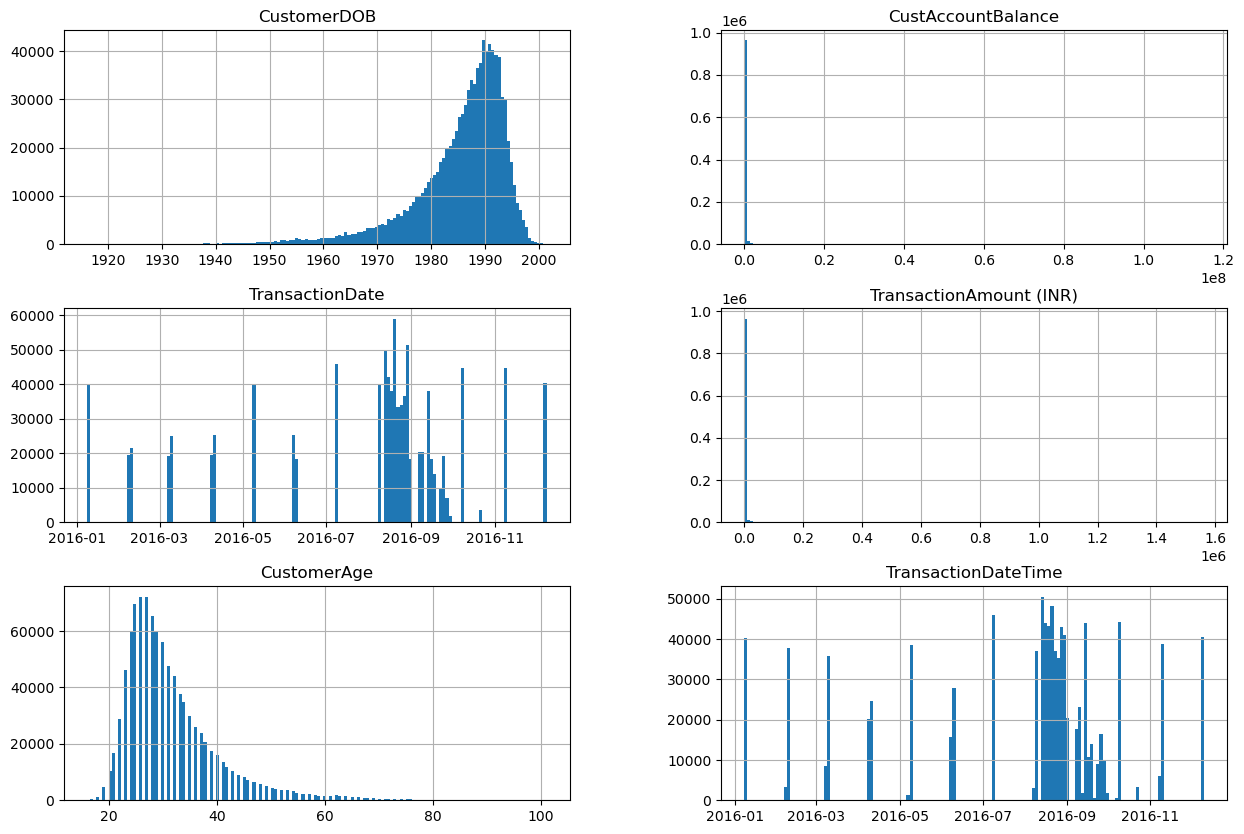

In [33]:
bank_data_for_plotting_ONLY = bank_data.drop_duplicates(subset="NewCustomerID") # this df contains individual customers only bar those that had same ID but different DOB
# Histograms for numerical variables
bank_data.hist(bins=150, figsize=(15, 10))
plt.show()

/Users/manahilshanzad/anaconda3/envs/project-env/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


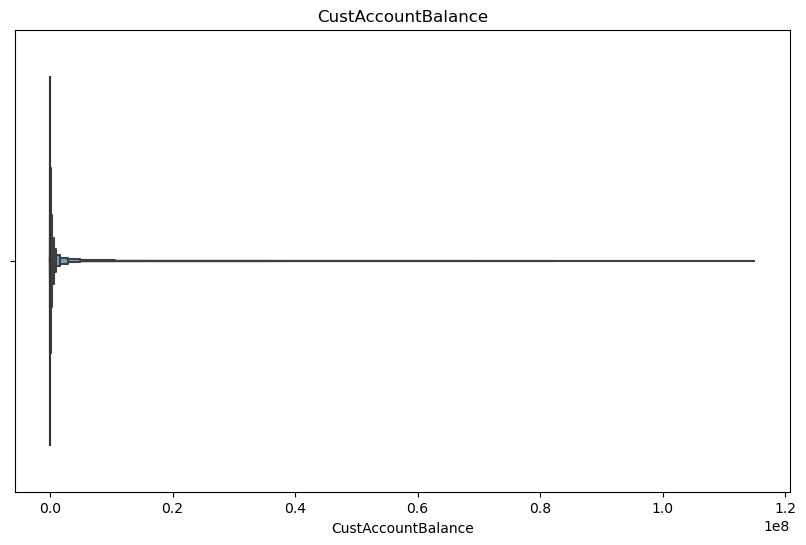

/Users/manahilshanzad/anaconda3/envs/project-env/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


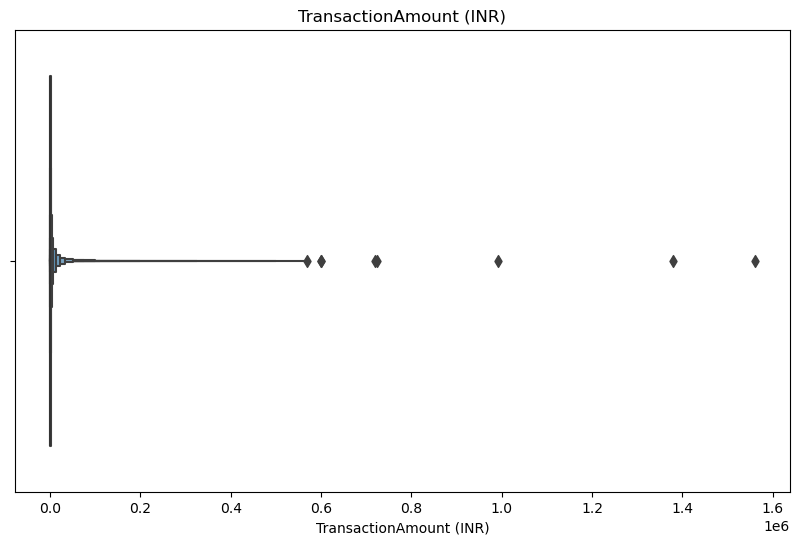

/Users/manahilshanzad/anaconda3/envs/project-env/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


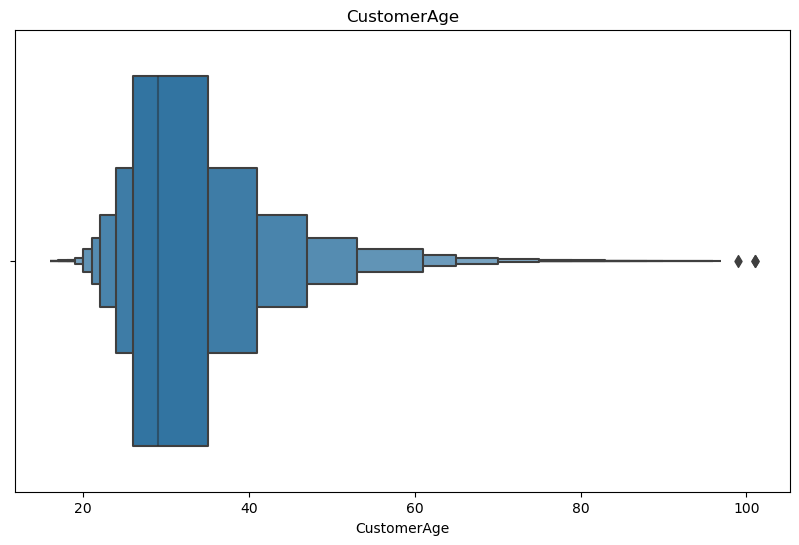

In [34]:
# Box plots for numerical variables to check for outliers
for col in bank_data.select_dtypes(exclude=['object', 'bool','datetime64']).columns:
    plt.figure(figsize=(10, 6))
    plt.title(col)
    # sns.boxplot(data=bank_data, x=col)
    sns.boxenplot(data=bank_data, x=col)
    plt.show()

In [35]:
print("max account balance: ", bank_data_for_plotting_ONLY["CustAccountBalance"].max())
print("mean account balance: ", bank_data_for_plotting_ONLY["CustAccountBalance"].mean())
print("median account balance: ", bank_data_for_plotting_ONLY["CustAccountBalance"].median())
print("Standard Deviation of account balance: ", bank_data_for_plotting_ONLY["CustAccountBalance"].std())
quant = 0.96
print(f"account balance at [{quant}] quantile:  ", bank_data_for_plotting_ONLY["CustAccountBalance"].quantile(quant))
threshold = 500000
print(f"Percentage of Account balance at different thresholds [{threshold}]: ", 
    (len(bank_data_for_plotting_ONLY[bank_data_for_plotting_ONLY["CustAccountBalance"] < threshold])/ len(bank_data)) * 100)
print(f"around 96% of Account Balances fall below {threshold} INR")
print("Total: ", len(bank_data["TransactionAmount (INR)"]))
print(f"Values below {threshold}: ", len(bank_data_for_plotting_ONLY[bank_data_for_plotting_ONLY["CustAccountBalance"] < threshold]))
print(f"Values above {threshold}: ", len(bank_data_for_plotting_ONLY[bank_data_for_plotting_ONLY["CustAccountBalance"] > threshold]))

max account balance:  115035495.1
mean account balance:  106024.80443796674
median account balance:  16007.76
Standard Deviation of account balance:  814318.2666270267
account balance at [0.96] quantile:   465807.12
Percentage of Account balance at different thresholds [500000]:  96.18130693640386
around 96% of Account Balances fall below 500000 INR
Total:  984761
Values below 500000:  947156
Values above 500000:  36389


/Users/manahilshanzad/anaconda3/envs/project-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


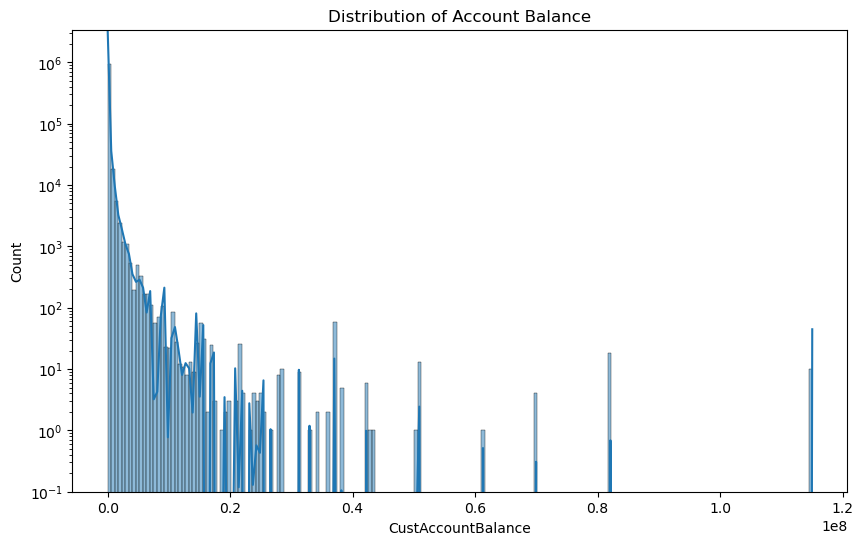

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(bank_data_for_plotting_ONLY["CustAccountBalance"], bins=200, kde=True)
plt.ylim(10**-1)
plt.yscale("log")
plt.title('Distribution of Account Balance')
plt.show()

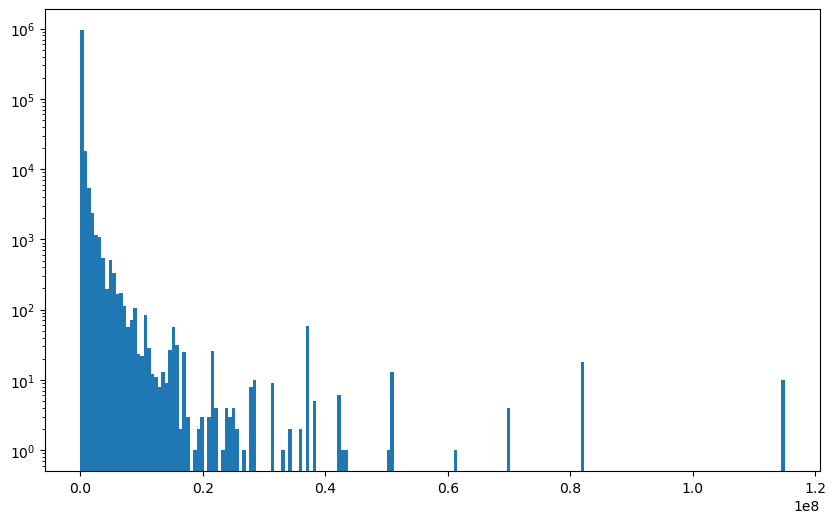

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(bank_data_for_plotting_ONLY["CustAccountBalance"], bins= 200, log=True)
plt.show()

/Users/manahilshanzad/anaconda3/envs/project-env/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


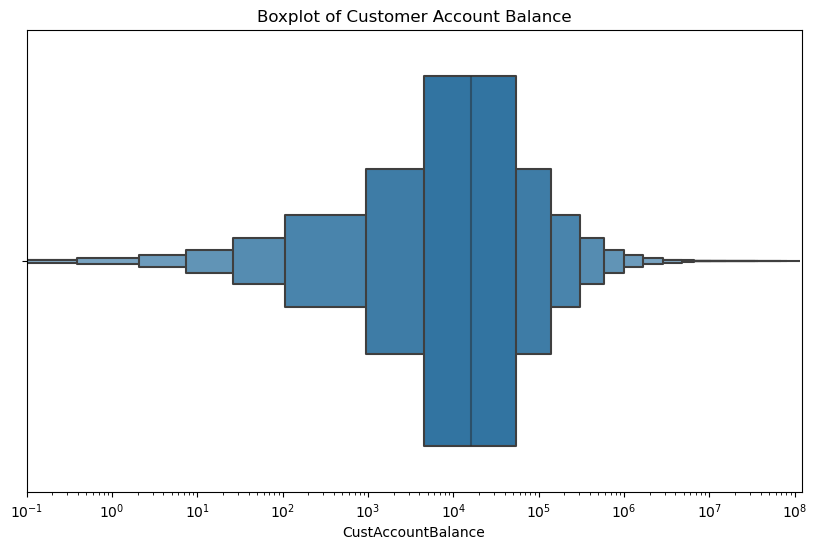

In [38]:
plt.figure(figsize=(10, 6))
sns.boxenplot(bank_data_for_plotting_ONLY, x = "CustAccountBalance")
plt.xlim(10**-1)
plt.xscale("log")
plt.title('Boxplot of Customer Account Balance')
plt.show()

In [39]:
# we use bank_data here because we want to capture the trend of all transaction data even those made by the same user multiple times
print("max transaction amount: ", bank_data["TransactionAmount (INR)"].max())
print("mean transaction amount: ", bank_data["TransactionAmount (INR)"].mean())
print("median transaction amount: ", bank_data["TransactionAmount (INR)"].median())
print("Standard Deviation of transaction amount: ", bank_data["TransactionAmount (INR)"].std())
quant = 0.96
print(f"transaction amount at [{quant}] quantile:  ", bank_data["TransactionAmount (INR)"].quantile(quant))
threshold = 6000
print(f"Percentage of transaction amount at different thresholds [{threshold}]: ", 
    (len(bank_data[bank_data["TransactionAmount (INR)"] < threshold])/ len(bank_data)) * 100)
print(f"around 96% of transactions fall below {threshold} INR")
print("Total: ", len(bank_data["TransactionAmount (INR)"]))
print(f"Values below {threshold}: ", len(bank_data[bank_data["TransactionAmount (INR)"] < threshold]))
print(f"Values above {threshold}: ", len(bank_data[bank_data["TransactionAmount (INR)"] > threshold]))

max transaction amount:  1560034.99
mean transaction amount:  1452.010945366439
median transaction amount:  431.0
Standard Deviation of transaction amount:  6140.444620898631
transaction amount at [0.96] quantile:   5864.0
Percentage of transaction amount at different thresholds [6000]:  96.1070757270038
around 96% of transactions fall below 6000 INR
Total:  984761
Values below 6000:  946425
Values above 6000:  37688


[]

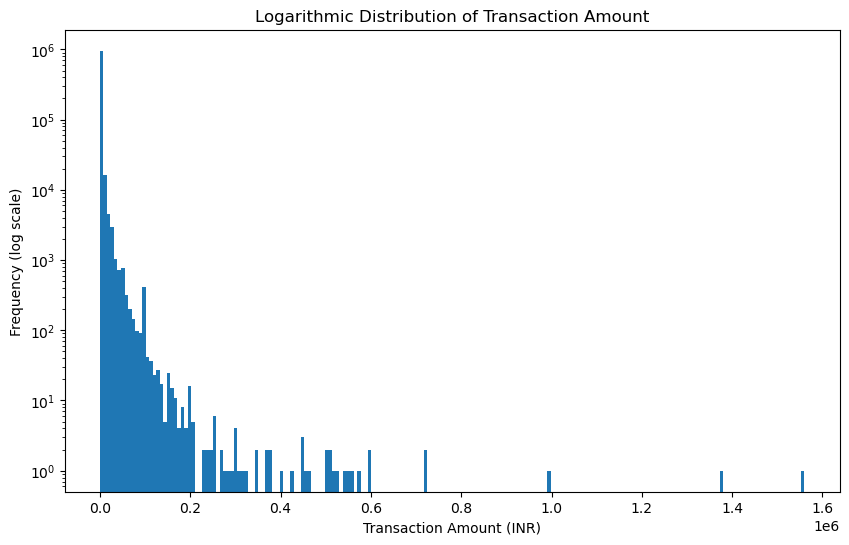

In [40]:
# we use bank_data here because we want to capture the trend of all transaction data even those made by the same user multiple times
plt.figure(figsize=(10, 6))
plt.hist(bank_data['TransactionAmount (INR)'], bins= 200)
plt.yscale('log')
plt.title("Logarithmic Distribution of Transaction Amount")
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Frequency (log scale)')
plt.plot()

/Users/manahilshanzad/anaconda3/envs/project-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


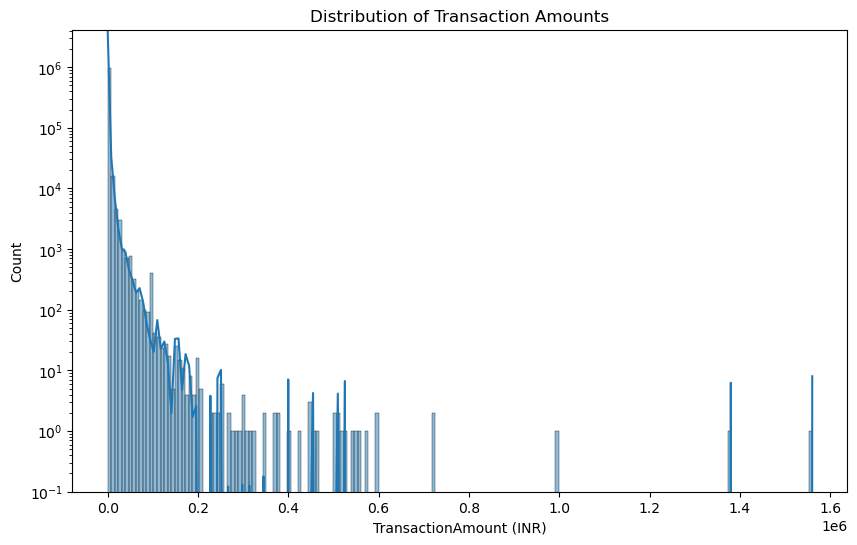

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(bank_data["TransactionAmount (INR)"], bins=200, kde=True)
plt.ylim(10**-1)
plt.yscale("log")
plt.title('Distribution of Transaction Amounts')
plt.show()

/Users/manahilshanzad/anaconda3/envs/project-env/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


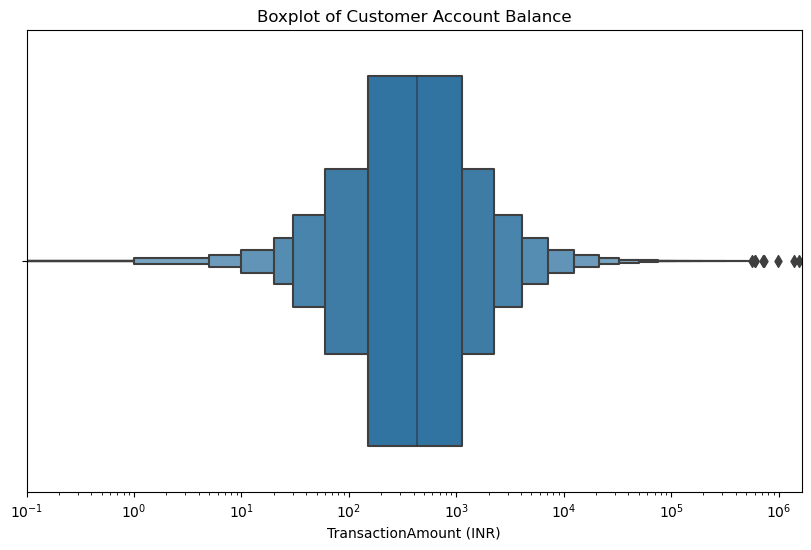

In [42]:
plt.figure(figsize=(10, 6))
sns.boxenplot(bank_data, x = "TransactionAmount (INR)")
plt.xlim(10**-1)
plt.xscale("log")
plt.title('Boxplot of Customer Account Balance')
plt.show()

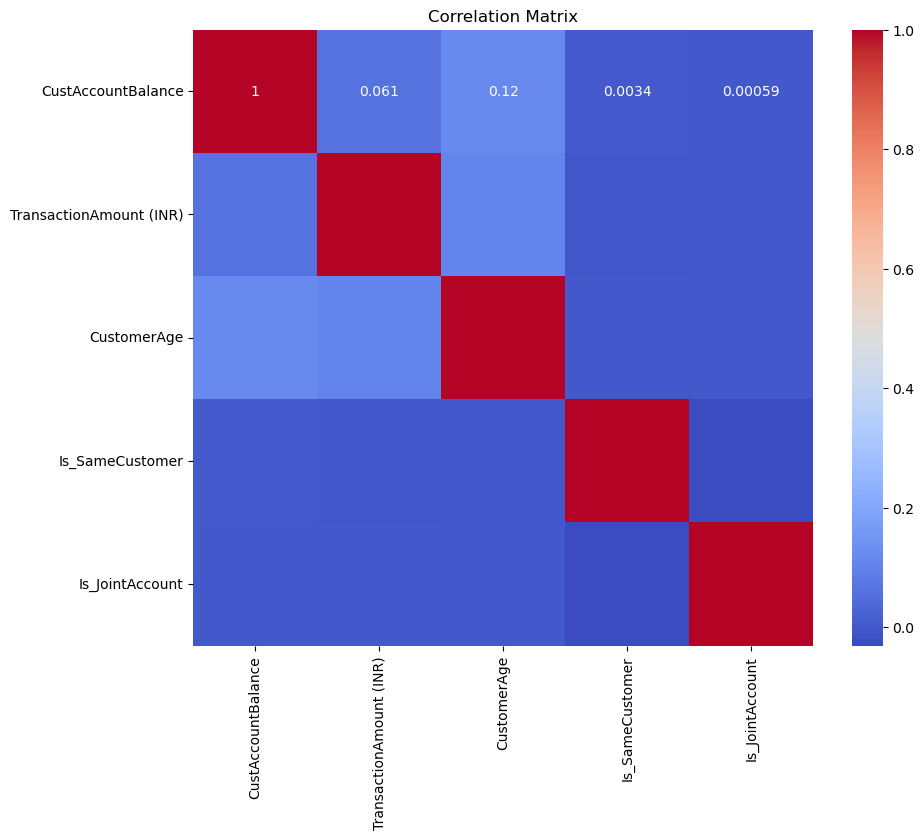

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(bank_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

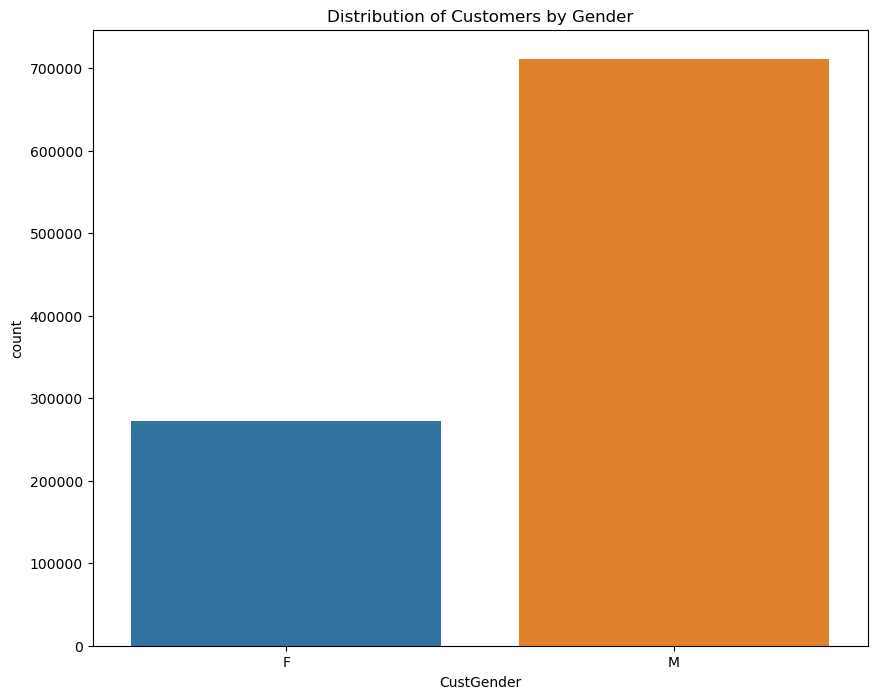

In [44]:
#Distribution of customers by gender (CustGender)
plt.figure(figsize=(10, 8))
sns.countplot(x='CustGender',data = bank_data_for_plotting_ONLY)
plt.title('Distribution of Customers by Gender')
plt.show()

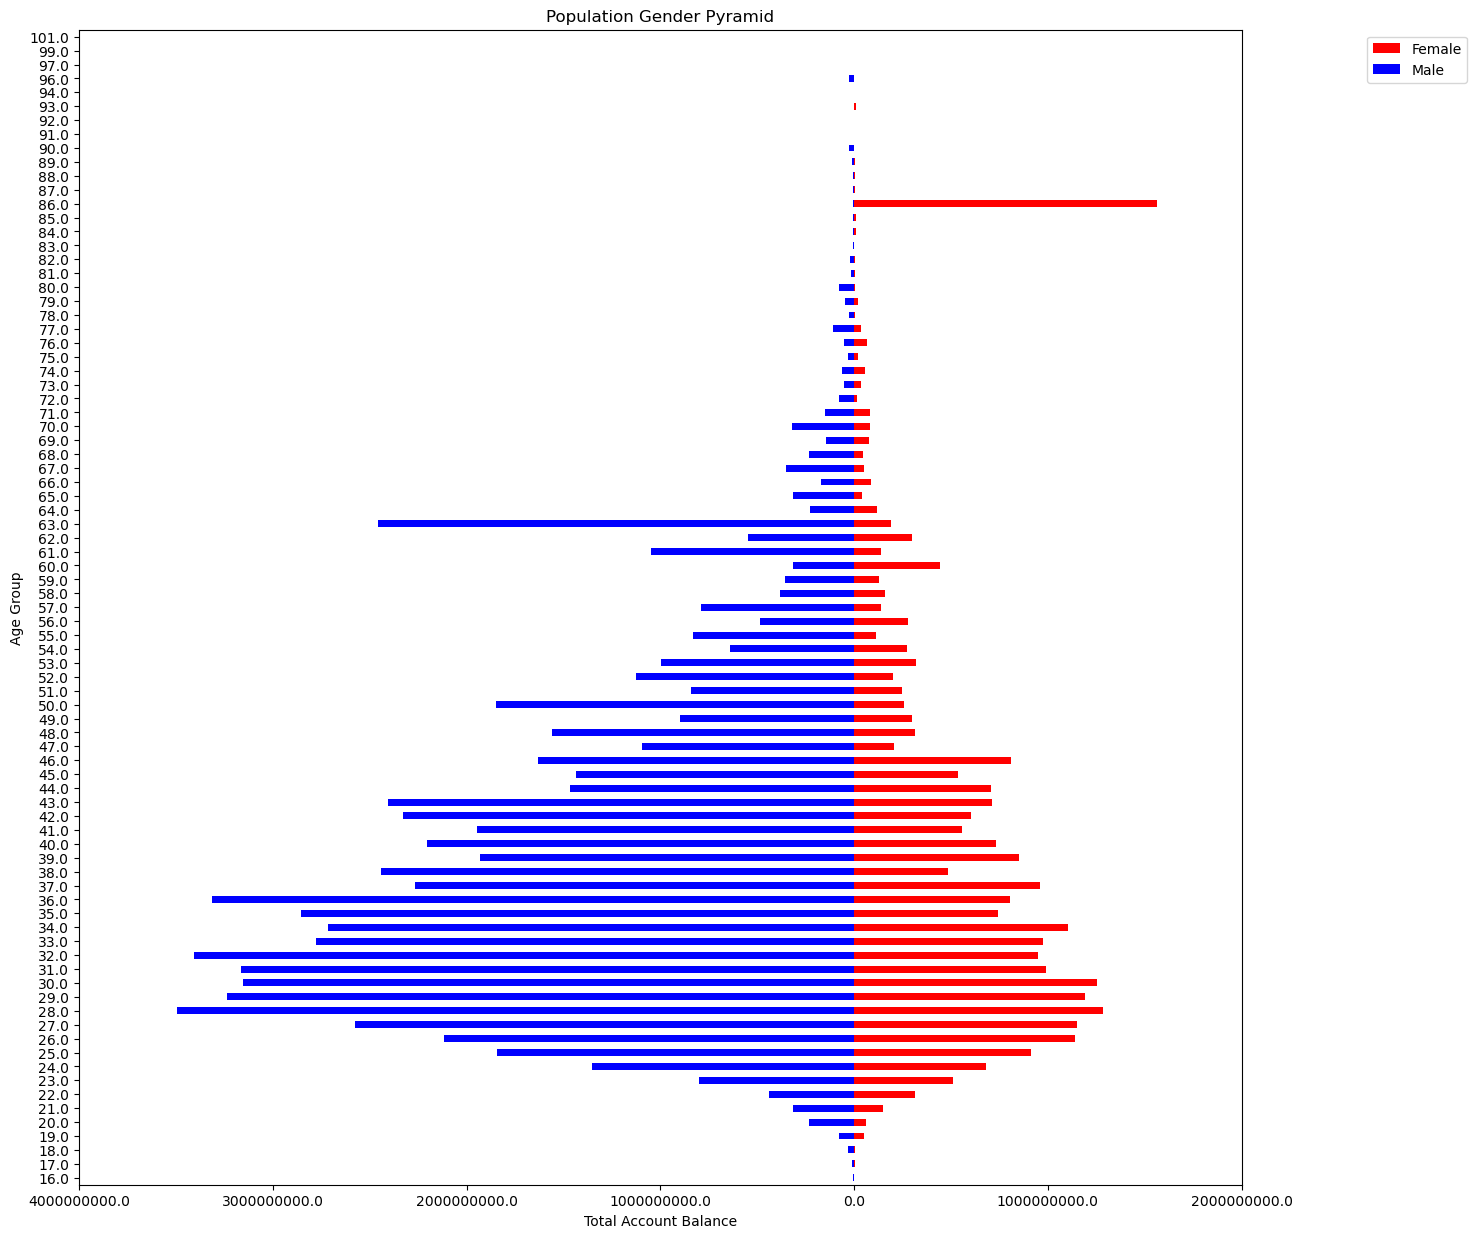

In [45]:
# Sum the CustAccountBalance for each CustomerAge and CustGender group
age_gender_balance = bank_data.groupby(['CustomerAge', 'CustGender'])['CustAccountBalance'].sum().unstack(fill_value=0)

# The negative values for males will be needed to plot them on the left side of the pyramid
age_gender_balance['M'] = -age_gender_balance['M']

# Create the gender pyramid plot
fig, ax = plt.subplots(figsize=(15, 15))

# Plot females
age_gender_balance['F'].plot(kind='barh', ax=ax, color='red', label='Female')

# Plot males
age_gender_balance['M'].plot(kind='barh', ax=ax, color='blue', label='Male')

# Adjust the x-axis to show positive labels for both sides
ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels([str(abs(tick)) for tick in ticks])

# Set labels and title
ax.set_xlabel('Total Account Balance')
ax.set_ylabel('Age Group')
ax.set_title('Population Gender Pyramid')

# Move the legend out of the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Show the plot
plt.show()


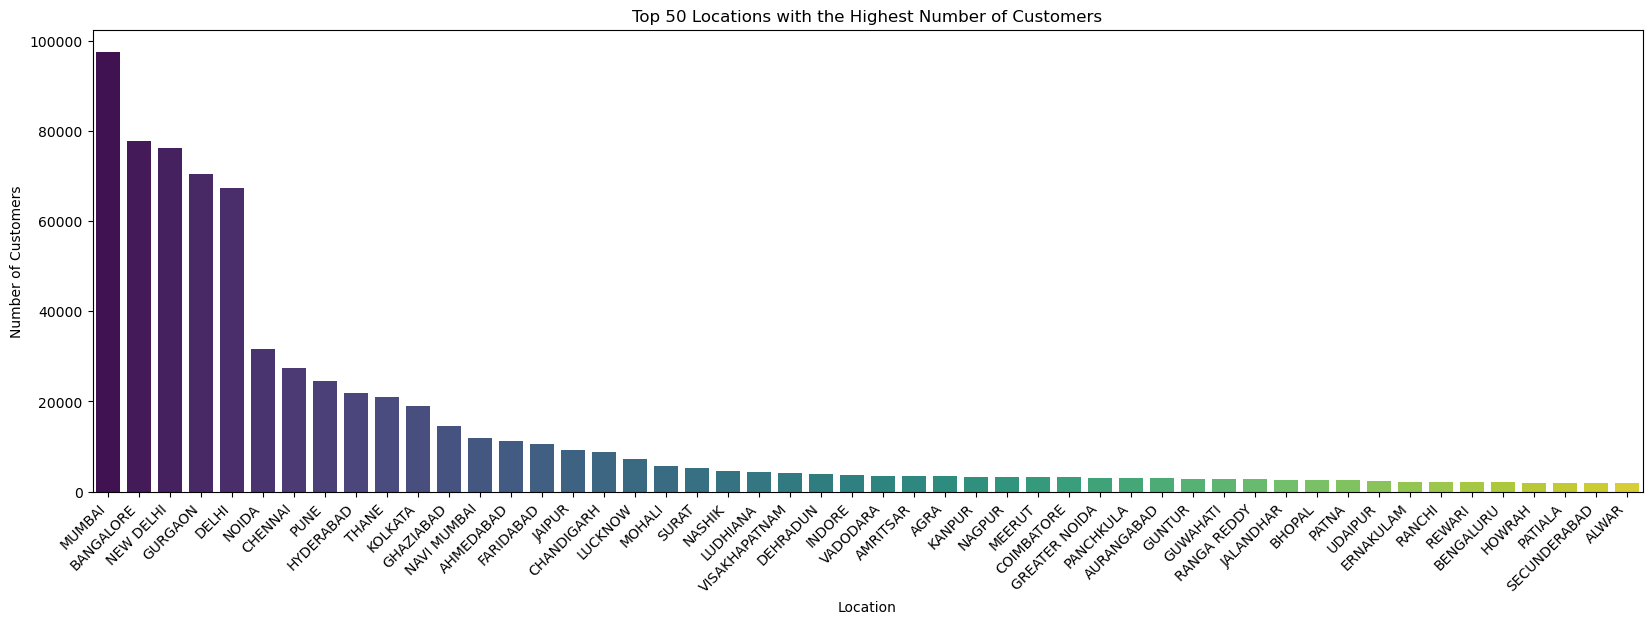

In [46]:
# Location with the highest number of customers (CustLocation)
location_counts = bank_data_for_plotting_ONLY['CustLocation'].value_counts().nlargest(50)
plt.figure(figsize=(20, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Top 50 Locations with the Highest Number of Customers')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()


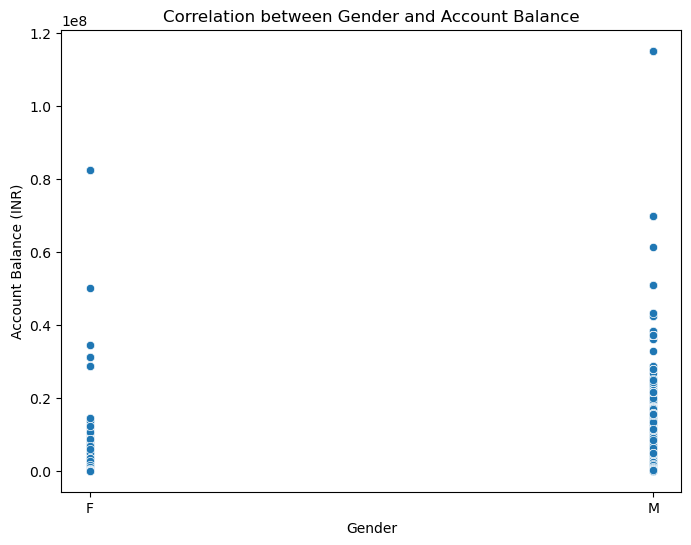

In [47]:
# Correlation between gender and customer account balance
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CustGender', y='CustAccountBalance', data=bank_data_for_plotting_ONLY)
plt.title('Correlation between Gender and Account Balance')
plt.xlabel('Gender')
plt.ylabel('Account Balance (INR)')
plt.show()

This shows males have a generally high Account balance compared to females

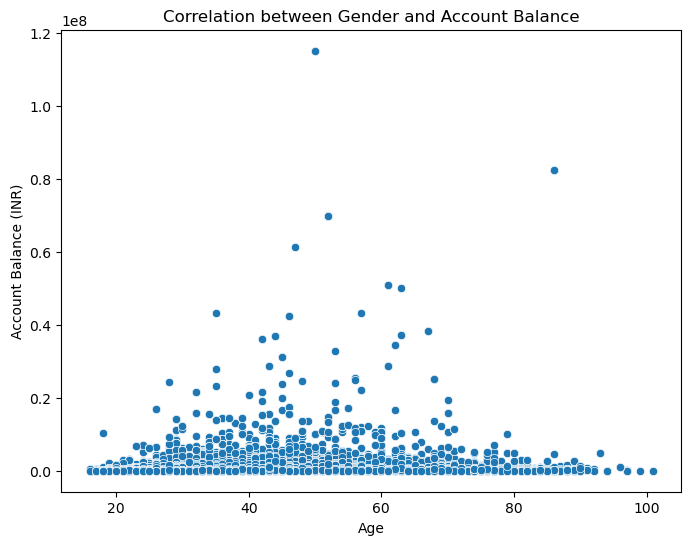

In [48]:
# Correlation between age and customer account balance
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CustomerAge', y='CustAccountBalance', data=bank_data_for_plotting_ONLY)
plt.title('Correlation between Gender and Account Balance')
plt.xlabel('Age')
plt.ylabel('Account Balance (INR)')
plt.show()

People between the ages of approx. 25 to approx. 70 have a higher account balance 

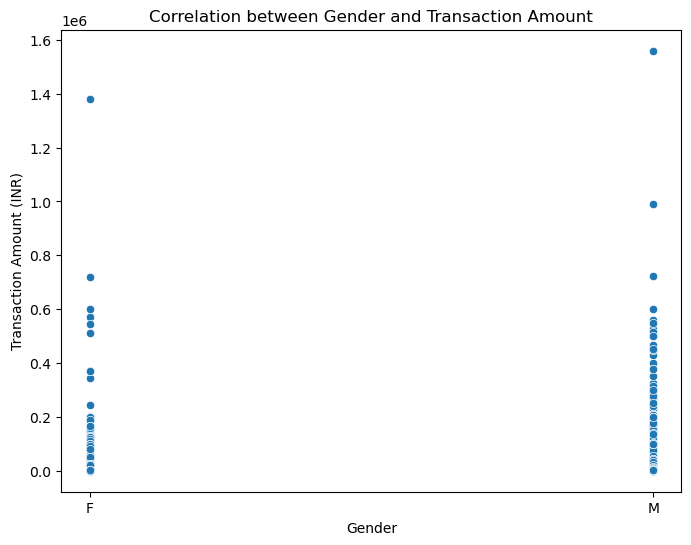

In [49]:
# Correlation between gender and customer transactions
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CustGender', y='TransactionAmount (INR)', data=bank_data_for_plotting_ONLY)
plt.title('Correlation between Gender and Transaction Amount')
plt.xlabel('Gender')
plt.ylabel('Transaction Amount (INR)')
plt.show()

Males generally transact in greater amounts compared to females

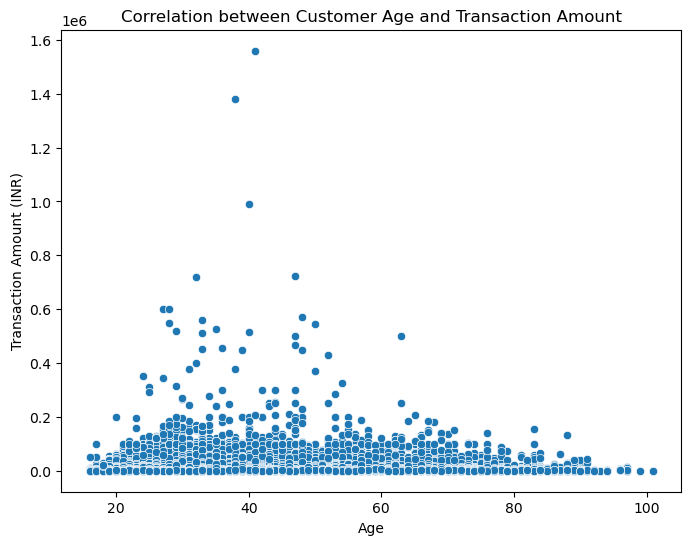

In [50]:
# Correlation between age and customer transactions
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CustomerAge', y='TransactionAmount (INR)', data=bank_data_for_plotting_ONLY)
plt.title('Correlation between Customer Age and Transaction Amount')
plt.xlabel('Age')
plt.ylabel('Transaction Amount (INR)')
plt.show()

This graph center heavy indicating people within the ages of approx. 25 to approx. 60~65 have higher transaction volumes

### I am trying to do some frequency analysis on transactions (Might come back to this later) 

In [51]:
same_cust_data = bank_data[bank_data['Is_SameCustomer'] == True]
same_cust_data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,AccountID,Is_SameCustomer,Is_JointAccount,NewCustomerID,TransactionDateTime
259,T260,C3531473,1989-03-12,M,KOLKATA,13592.65,2016-10-21,15:46:28,1128.37,28.0,A3531473,True,False,C35314730,2016-10-21 15:46:28
269,T270,C2526046,1988-07-01,F,KOLKATA,31369.53,2016-10-21,15:15:10,1735.00,28.0,A2526046,True,False,C25260460,2016-10-21 15:15:10
1172,T1173,C4740088,1976-03-17,M,GURGAON,20278.39,2016-10-21,21:02:49,55.00,41.0,A4740088,True,False,C47400880,2016-10-21 21:02:49
1232,T1233,C5141632,1991-12-24,F,DELHI,118.51,2016-10-21,21:02:37,280.00,25.0,A5141632,True,False,C51416320,2016-10-21 21:02:37
2588,T2589,C8133949,1978-11-13,M,HYDERABAD,61806.32,2016-10-21,19:36:18,850.00,38.0,A8133949,True,False,C81339490,2016-10-21 19:36:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046453,T1046454,C1140644,1985-03-06,M,SUPER MARKET BANGALORE,3092.06,2016-09-18,10:22:56,255.00,32.0,A1140644,True,False,C11406440,2016-09-18 10:22:56
1046899,T1046900,C2173491,1972-02-26,M,VADODARA,95445.47,2016-09-18,18:49:56,999.00,45.0,A2173491,True,False,C21734910,2016-09-18 18:49:56
1047401,T1047402,C8248728,1989-03-20,F,NOIDA,149.47,2016-09-18,17:58:10,1650.00,28.0,A8248728,True,False,C82487280,2016-09-18 17:58:10
1048043,T1048044,C6115521,1994-03-07,F,HYDERABAD,14001.22,2016-09-18,08:20:30,85.00,23.0,A6115521,True,False,C61155210,2016-09-18 08:20:30


In [52]:
same_cust_data.describe()

,CustomerDOB,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge,TransactionDateTime
count,2424,2.424000e+03,2424,2424.000000,2424.000000,2424
mean,1985-09-24 13:55:14.851485120,1.615865e+05,2016-07-26 01:20:47.524752384,1061.788205,31.229373,2016-07-26 16:57:39.122937344
min,1929-04-08 00:00:00,0.000000e+00,2016-01-08 00:00:00,0.000000,17.000000,2016-01-08 00:16:19
25%,1982-08-29 12:00:00,5.756225e+03,2016-06-09 00:00:00,115.000000,26.000000,2016-06-09 21:51:29.249999872
50%,1987-12-07 00:00:00,1.757539e+04,2016-08-20 00:00:00,350.000000,29.000000,2016-08-20 15:59:57.500000
75%,1991-06-01 00:00:00,5.375908e+04,2016-09-08 00:00:00,962.000000,34.000000,2016-09-08 23:12:04.249999872
max,1999-10-14 00:00:00,8.224463e+07,2016-12-09 00:00:00,100000.000000,88.000000,2016-12-09 23:37:09
std,NaN,2.392254e+06,NaN,3865.436896,8.815963,NaN


/Users/manahilshanzad/anaconda3/envs/project-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


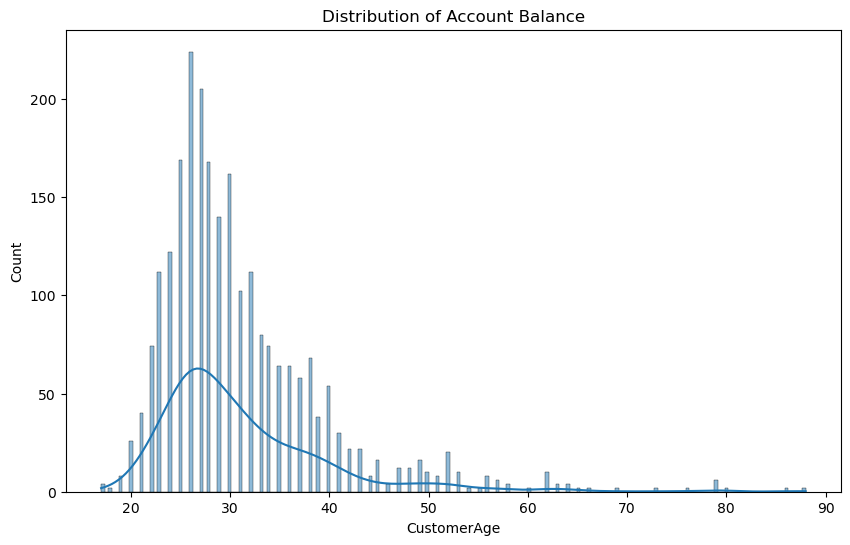

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(same_cust_data["CustomerAge"], bins=200, kde=True)
# plt.ylim(10**-1)
# plt.yscale("log")
plt.title('Distribution of Account Balance')
plt.show()

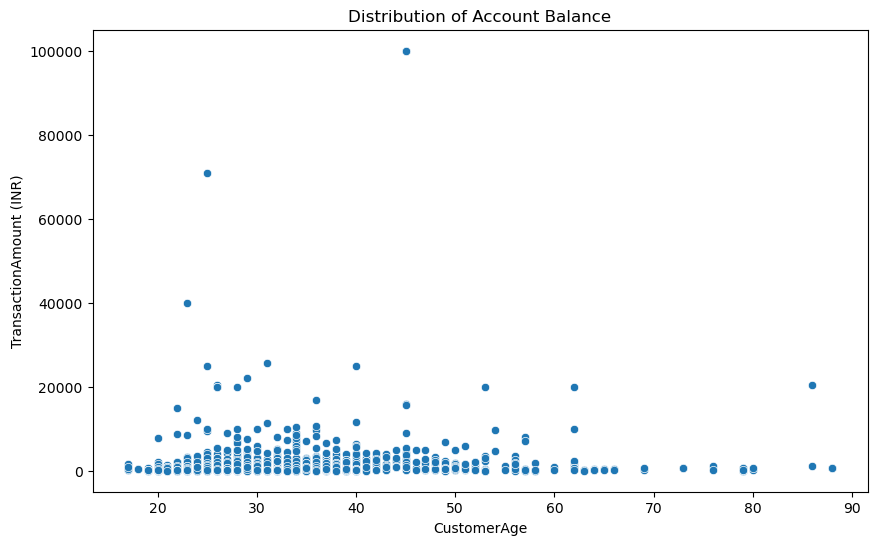

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(same_cust_data, x="CustomerAge", y="TransactionAmount (INR)")
# plt.ylim(10**-1)
# plt.yscale("log")
plt.title('Distribution of Account Balance')
plt.show()

In [55]:
customer_freq = same_cust_data.groupby('NewCustomerID').size()
customer_freq

NewCustomerID
C10106360    2
C10109880    2
C10117160    2
C10126270    2
C10191700    2
            ..
C90390300    2
C90394730    2
C90405780    2
C90757770    2
C90830210    2
Length: 1208, dtype: int64

In [56]:
customer_total_amount = same_cust_data.groupby('CustomerID')['TransactionAmount (INR)'].sum()
customer_total_amount

CustomerID
C1010636    1367.00
C1010988    1700.00
C1011716    1047.00
C1012627     868.72
C1019170    2226.00
             ...   
C9039030    1050.00
C9039473    3451.00
C9040578    2300.00
C9075777     153.00
C9083021     549.39
Name: TransactionAmount (INR), Length: 1208, dtype: float64

/Users/manahilshanzad/anaconda3/envs/project-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


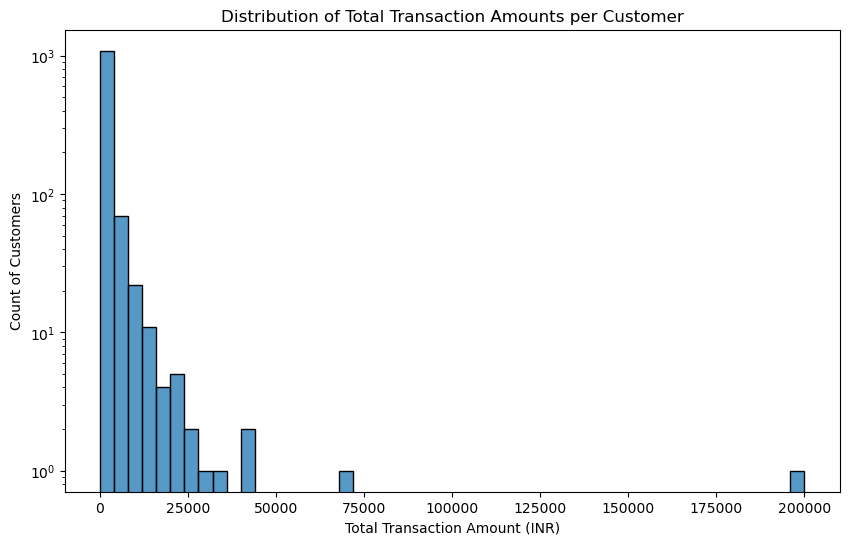

In [57]:
# Plot the transaction amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_total_amount, bins=50, kde=False, log_scale=(False, True))
plt.title('Distribution of Total Transaction Amounts per Customer')
plt.xlabel('Total Transaction Amount (INR)')
plt.ylabel('Count of Customers')
plt.show()

## RFM ANALYSIS


In [58]:
current_date_time = bank_data['TransactionDateTime'].max()
current_date_time

Timestamp('2016-12-09 23:59:59')

In [59]:
bank_data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,AccountID,Is_SameCustomer,Is_JointAccount,NewCustomerID,TransactionDateTime
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,22.0,A5841053,False,False,C58410530,2016-02-08 14:32:07
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,60.0,A2142763,False,False,C21427630,2016-02-08 14:18:58
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,20.0,A4417068,False,False,C44170680,2016-02-08 14:27:12
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,43.0,A5342380,False,True,C5342380B,2016-02-08 14:27:14
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,29.0,A9031234,False,False,C90312340,2016-02-08 18:11:56
